
train_loss 
epoch 0: 
999.696781053

validation_loss
epoch 0: 
1011.8287488

train_loss 
epoch 1: 
615.663152728

validation_loss
epoch 1: 
636.847691797

train_loss 
epoch 2: 
413.85858597

validation_loss
epoch 2: 
429.168900024

train_loss 
epoch 3: 
291.5403119

validation_loss
epoch 3: 
302.13769484

train_loss 
epoch 4: 
211.838243373

validation_loss
epoch 4: 
219.782566742

train_loss 
epoch 5: 
157.726197923

validation_loss
epoch 5: 
164.261408008

train_loss 
epoch 6: 
119.983707392

validation_loss
epoch 6: 
125.732604162

train_loss 
epoch 7: 
93.1268966845

validation_loss
epoch 7: 
98.3760597161

train_loss 
epoch 8: 
73.7037010945

validation_loss
epoch 8: 
78.5773170836

train_loss 
epoch 9: 
59.4590730447

validation_loss
epoch 9: 
64.0087300259

train_loss 
epoch 10: 
48.8809477629

validation_loss
epoch 10: 
53.1287223331

train_loss 
epoch 11: 
40.9352263826

validation_loss
epoch 11: 
44.8931568028

train_loss 
epoch 12: 
34.9033356737

validation_loss
epoch 12: 

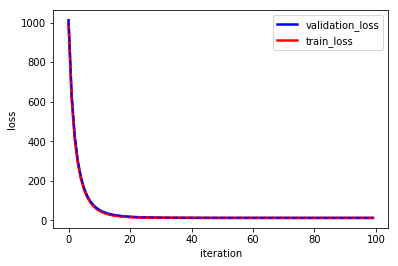

In [10]:
from sklearn.datasets import load_svmlight_file as load
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def compute_loss(x,y,k):
    n = x.shape[0]
    loss = np.sum(np.square((x * w - y))) / (2 * n) + np.sum(np.square(w)) * lamb
    print('epoch '+ str(k) + ': ')
    print(loss)
    return loss

#load data
data = load('./housing_scale.txt')
x, y = data[0], data[1]
x_train,x_validation,y_train,y_validation = train_test_split(x,y,test_size=0.33,random_state=42)
x_train,x_validation,y_train,y_validation = x_train.todense(),x_validation.todense(),y_train.reshape(len(y_train),-1),y_validation.reshape(len(y_validation),-1)


#initialize b,w
b_train = np.zeros(x_train.shape[0])
x_train = np.column_stack((b_train,x_train))
b_validation = np.zeros(x_validation.shape[0])
x_validation = np.column_stack((b_validation,x_validation))
w = np.empty((x_train.shape[1],1))

# training
iteration = 100
learning_rate = 0.01
lamb = 0.0001
train_loss=[]
validation_loss=[]
for i in range(iteration):
    for j in range(x_train.shape[0]):
        gradient = x_train[j].T * (x_train[j] * w - y_train[j]) + lamb * w
        w = w - learning_rate * gradient
    print('\ntrain_loss ')
    train_loss.append( compute_loss(x_train,y_train,i))
    print('\nvalidation_loss')
    validation_loss.append(compute_loss(x_validation,y_validation,i))

# for plt
t = np.arange(0, iteration, 1)
plt.plot(t, validation_loss, color="blue", linewidth=2.5, linestyle="-", label="validation_loss")
plt.plot(t, train_loss, color="red",  linewidth=2.5, linestyle="-", label="train_loss")
plt.legend(loc='upper right')
plt.plot(t, train_loss, 'r--',t, validation_loss, 'b--')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()